# CASO 2: Hepatitis

En el siguiente caso usaremos el set de datos de hepatitis de OpenML. Su nombre es: ilpd

Este conjunto de datos contiene 416 registros de pacientes hepáticos y 167 registros de pacientes no hepáticos. El conjunto de datos se recopiló en el noreste de Andhra Pradesh, India. La etiqueta de clase divide a los pacientes en 2 grupos (paciente hepático o no). Este conjunto de datos contiene 441 registros de pacientes masculinos y 142 registros de pacientes femeninas.

Información de atributos

V1. Edad del paciente. Cualquier paciente cuya edad supere los 89 años figura como de "90 años".

V2. Género del paciente

V3. Bilirrubina total

V4. Bilirrubina Directa

V5. Alcfos Fosfatasa Alcalina

V6. Sargento Alanina Aminotransferasa

V7. Sgot Aspartato Aminotransferasa

V8. Proteínas Totales

V9. Albúmina

V10. Proporción A/G Proporción de albúmina y globulina

Una vez que cargue los datos, tendrá que codificar la variable V2 (género del paciente). El código a usar es el siguiente:

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Cargar dataset desde OpenML
data = fetch_openml(data_id=1480, as_frame=True)
df = data.frame

# Mostrar nombres reales de las columnas
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Class'], dtype='object')


In [ ]:
# 2. Codificar la columna V2 (Género del paciente)
le = preprocessing.LabelEncoder()
df['V2'] = le.fit_transform(df['V2'])

# 3. Renombrar la columna objetivo 'Class' a 'Target'
df.rename(columns={'Class': 'Target'}, inplace=True)

# 4. Convertir a binaria: 1 si tiene hepatitis, 0 si no
df['Target'] = df['Target'].astype(int).apply(lambda x: 1 if x == 1 else 0)

# 5. Separar variables predictoras y objetivo
X = df.drop(columns='Target')
y = df['Target']

# 7. Entrenar modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# 7. Predecir sobre los mismos datos
y_pred = model.predict(X)

# 8. Calcular accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


¿Cuántos registros quedan bien clasificados, sin impurezas, al limitar la hoja a mínimo 30 ejemplos y random_state=42?

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Cargar datos
data = fetch_openml(data_id=1480, as_frame=True)
df = data.frame

# Codificar género
le = preprocessing.LabelEncoder()
df['V2'] = le.fit_transform(df['V2'])

# Renombrar y binarizar
df.rename(columns={'Class': 'Target'}, inplace=True)
df['Target'] = df['Target'].astype(int).apply(lambda x: 1 if x == 1 else 0)

# Separar variables
X = df.drop(columns='Target')
y = df['Target']

# Modelo con hoja mínima de 30
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=30)
model.fit(X, y)

# Predecir hoja a la que cae cada registro
leaf_nodes = model.apply(X)

# Obtener valores reales y predichos
y_pred = model.predict(X)

# Identificar hojas puras (sin impureza)
pure_leaves = set()
for node in np.unique(leaf_nodes):
    idxs = np.where(leaf_nodes == node)[0]
    clases_en_nodo = y.iloc[idxs].unique()
    if len(clases_en_nodo) == 1:
        pure_leaves.add(node)

# Contar registros correctamente clasificados en hojas puras
bien_clasificados = 0
for i, nodo in enumerate(leaf_nodes):
    if nodo in pure_leaves and y.iloc[i] == y_pred[i]:
        bien_clasificados += 1

print(f"Registros correctamente clasificados en hojas puras: {bien_clasificados}")



Registros correctamente clasificados en hojas puras: 85


Ahora elimina el límite de 30 casos por hoja y agrega la restricción de que haga como máximo 5 pisos de profundidad. ¿Cuál es el máximo gini obtenido en sus hojas?

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Cargar dataset
data = fetch_openml(data_id=1480, as_frame=True)
df = data.frame

# Codificar 'V2' (Género)
le = preprocessing.LabelEncoder()
df['V2'] = le.fit_transform(df['V2'])

# Renombrar y binarizar target
df.rename(columns={'Class': 'Target'}, inplace=True)
df['Target'] = df['Target'].astype(int).apply(lambda x: 1 if x == 1 else 0)

# Separar X e y
X = df.drop(columns='Target')
y = df['Target']

# Entrenar árbol con profundidad máxima de 5 (sin min_samples_leaf)
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X, y)

# Obtener la impureza (Gini) de todos los nodos
impurezas = model.tree_.impurity
es_hoja = model.tree_.children_left == -1  # hojas tienen hijos = -1

# Obtener impureza solo de las hojas
gini_hojas = impurezas[es_hoja]

# Mostrar el máximo Gini en las hojas
print(f"Máximo Gini en hojas: {max(gini_hojas):.3f}")


Máximo Gini en hojas: 0.500


Pregunta 9
Usando el modelo generado en la última pregunta ¿Cuál es la probabilidad de que un hombre con 58 años tenga hepatitis cuando sus exámenes tienen los siguientes números?

In [ ]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 2. Cargar el dataset ILPD desde OpenML
data = fetch_openml(name='ilpd', version=1, as_frame=True)
df = data.frame

# 3. Renombrar columnas para claridad
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkphos',
              'Sgpt', 'Sgot', 'Total_Proteins', 'Albumin', 'AG_Ratio', 'Target']

# 4. Codificar 'Gender': Male=1, Female=0
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# 5. Convertir la variable objetivo a binaria: 1 = hepático, 0 = no hepático
df['Target'] = df['Target'].astype(int).apply(lambda x: 1 if x == 1 else 0)

# 6. Eliminar registros con valores nulos
df.dropna(inplace=True)

# 7. Separar variables predictoras y objetivo
X = df.drop(columns='Target')
y = df['Target']

# 8. Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 9. Entrenar modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 10. Ingresar datos de un paciente específico
# Edad=58, Hombre=1, Total Bilirrubina=1.0, Directa=0.4, Alkphos=182,
# Sgpt=14, Sgot=20, Proteínas=6.8, Albúmina=3.4, Proporción A/G=1.0
paciente = np.array([[58, 1, 1.0, 0.4, 182, 14, 20, 6.8, 3.4, 1.0]])

# 11. Predecir la probabilidad de tener hepatitis
probabilidad = clf.predict_proba(paciente)[0][1]
print(f"Probabilidad de que el paciente tenga hepatitis: {probabilidad:.2f}")




Probabilidad de que el paciente tenga hepatitis: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Pregunta 10
Una de las ventajas que tienen los modelos de Árboles de decisión es que puedes determinar qué variables inciden más y cuales menos en la variable objetivo. Esto puede hacerse a través del siguiente código, que muestra un vector con el % de importancia para las variables en orden lineal:



**clf.feature_importances_**

Importancia de las variables:
           Variable  Importancia
2   Total_Bilirubin     0.177133
0               Age     0.158415
4           Alkphos     0.145349
5              Sgpt     0.118687
6              Sgot     0.114819
9          AG_Ratio     0.105296
7    Total_Proteins     0.080647
8           Albumin     0.063067
3  Direct_Bilirubin     0.026517
1            Gender     0.010070


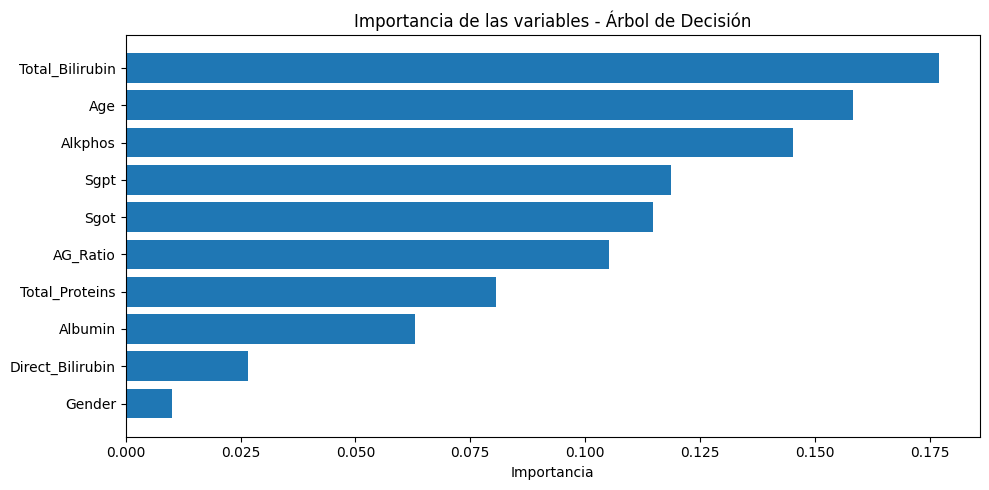

In [ ]:
# 1. Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# 2. Cargar el dataset ILPD desde OpenML
data = fetch_openml(name='ilpd', version=1, as_frame=True)
df = data.frame

# 3. Renombrar columnas para mayor claridad
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkphos',
              'Sgpt', 'Sgot', 'Total_Proteins', 'Albumin', 'AG_Ratio', 'Target']

# 4. Codificar la columna 'Gender' (Male/Female → 1/0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# 5. Asegurar que la variable objetivo sea binaria (1 = hepático, 0 = no hepático)
df['Target'] = df['Target'].astype(int).apply(lambda x: 1 if x == 1 else 0)

# 6. Eliminar registros con valores nulos (NaN)
df.dropna(inplace=True)

# 7. Separar variables predictoras y variable objetivo
X = df.drop(columns='Target')
y = df['Target']

# 8. Entrenar el árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# 9. Obtener la importancia de las variables
importancias = clf.feature_importances_
variables = X.columns

# 10. Crear DataFrame ordenado con las importancias
importancia_df = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# 11. Mostrar resultados en consola
print("Importancia de las variables:")
print(importancia_df)

# 12. Visualizar en gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de las variables - Árbol de Decisión')
plt.tight_layout()
plt.show()


Pregunta 11
Siguiendo con el modelo anterior ¿Cuales variables no inciden en nada para determinar si una persona tiene o no hepatitis? (marque 1 o más según corresponda)


Importancia de las variables:
           Variable  Importancia
2   Total_Bilirubin     0.177133
0               Age     0.158415
4           Alkphos     0.145349
5              Sgpt     0.118687
6              Sgot     0.114819
9          AG_Ratio     0.105296
7    Total_Proteins     0.080647
8           Albumin     0.063067
3  Direct_Bilirubin     0.026517
1            Gender     0.010070


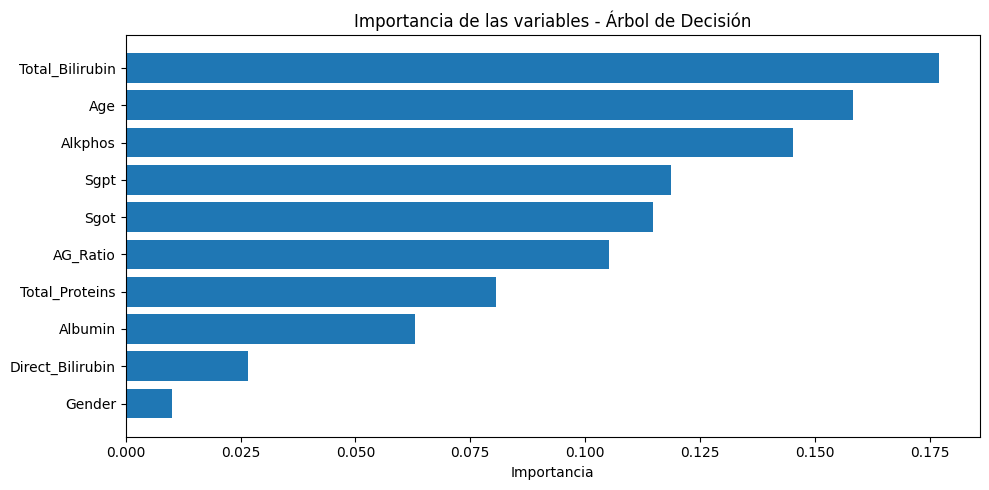

In [ ]:
# 1. Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

# 2. Cargar el dataset ILPD desde OpenML
data = fetch_openml(name='ilpd', version=1, as_frame=True)
df = data.frame

# 3. Renombrar columnas para mayor claridad
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkphos',
              'Sgpt', 'Sgot', 'Total_Proteins', 'Albumin', 'AG_Ratio', 'Target']

# 4. Codificar la columna 'Gender' (Male/Female → 1/0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# 5. Asegurar que la variable objetivo sea binaria (1 = hepático, 0 = no hepático)
df['Target'] = df['Target'].astype(int).apply(lambda x: 1 if x == 1 else 0)

# 6. Eliminar registros con valores nulos (NaN)
df.dropna(inplace=True)

# 7. Separar variables predictoras y variable objetivo
X = df.drop(columns='Target')
y = df['Target']

# 8. Entrenar el árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# 9. Obtener la importancia de las variables
importancias = clf.feature_importances_
variables = X.columns

# 10. Crear DataFrame ordenado con las importancias
importancia_df = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# 11. Mostrar resultados en consola
print("Importancia de las variables:")
print(importancia_df)

# 12. Visualizar en gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(importancia_df['Variable'], importancia_df['Importancia'])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de las variables - Árbol de Decisión')
plt.tight_layout()
plt.show()

🔴 Distribución original de clases: Counter({1: 416, 0: 167})

🔴 Resultados SIN SMOTE
Accuracy: 0.68
              precision    recall  f1-score   support

 No Hepático       0.40      0.57      0.47        37
    Hepático       0.83      0.72      0.77       109

    accuracy                           0.68       146
   macro avg       0.62      0.64      0.62       146
weighted avg       0.72      0.68      0.69       146



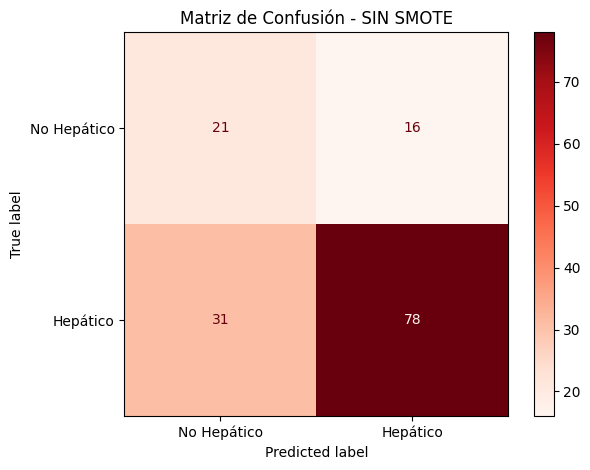


🟢 Distribución tras SMOTE: Counter({1: 416, 0: 416})

🟢 Resultados CON SMOTE
Accuracy: 0.72
              precision    recall  f1-score   support

 No Hepático       0.70      0.82      0.76       110
    Hepático       0.75      0.61      0.67        98

    accuracy                           0.72       208
   macro avg       0.73      0.72      0.72       208
weighted avg       0.73      0.72      0.72       208



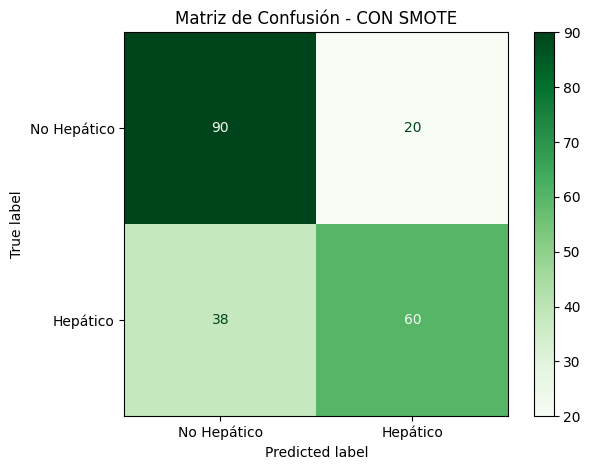

In [ ]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# 2. Cargar el dataset ILPD desde OpenML
data = fetch_openml(name='ilpd', version=1, as_frame=True)
df = data.frame

# 3. Renombrar columnas para mayor claridad
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkphos',
              'Sgpt', 'Sgot', 'Total_Proteins', 'Albumin', 'AG_Ratio', 'Target']

# 4. Preprocesamiento
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df['Target'] = df['Target'].astype(int).apply(lambda x: 1 if x == 1 else 0)
df.dropna(inplace=True)

# 5. Separar variables predictoras y objetivo
X = df.drop(columns='Target')
y = df['Target']

print("🔴 Distribución original de clases:", Counter(y))

# 6. Entrenar modelo SIN SMOTE
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, random_state=42)
clf_orig = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = clf_orig.predict(X_test_orig)

# Métricas del modelo sin SMOTE
print("\n🔴 Resultados SIN SMOTE")
print(f"Accuracy: {clf_orig.score(X_test_orig, y_test_orig):.2f}")
print(classification_report(y_test_orig, y_pred_orig, target_names=["No Hepático", "Hepático"]))

# Matriz de confusión sin SMOTE
cm_orig = confusion_matrix(y_test_orig, y_pred_orig)
ConfusionMatrixDisplay(confusion_matrix=cm_orig, display_labels=["No Hepático", "Hepático"]).plot(cmap="Reds")
plt.title("Matriz de Confusión - SIN SMOTE")
plt.tight_layout()
plt.show()

# 7. Aplicar SMOTE para balancear clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\n🟢 Distribución tras SMOTE:", Counter(y_resampled))

# 8. Entrenar modelo CON SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, random_state=42)
clf_smote = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test_smote)

# Métricas del modelo con SMOTE
print("\n🟢 Resultados CON SMOTE")
print(f"Accuracy: {clf_smote.score(X_test_smote, y_test_smote):.2f}")
print(classification_report(y_test_smote, y_pred_smote, target_names=["No Hepático", "Hepático"]))

# Matriz de confusión con SMOTE
cm_smote = confusion_matrix(y_test_smote, y_pred_smote)
ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=["No Hepático", "Hepático"]).plot(cmap="Greens")
plt.title("Matriz de Confusión - CON SMOTE")
plt.tight_layout()
plt.show()



# CASO 3: Grasa Corporal

En el siguiente caso usaremos el set de datos de Grasa Corporal de OpenML. Su nombre es: bodyfat

Este set de datos enumera en su variable objetivo estimaciones del porcentaje de grasa corporal determinado mediante pesaje bajo el agua y varias mediciones de circunferencia corporal para 252 personas. Las variables que se enumeran a continuación, de izquierda a derecha, son:

Densidad corporal a partir de la ecuación de Siri (1956), Edad (años), Peso (libras), Altura (pulgadas), Circunferencia del cuello (cm), Circunferencia del pecho (cm), Circunferencia del abdomen (cm), Circunferencia de la cadera (cm), Circunferencia del muslo ( cm), Circunferencia de la rodilla (cm), Circunferencia del tobillo (cm), Circunferencia del bíceps (extendido) (cm), Circunferencia del antebrazo (cm) y Circunferencia de la muñeca (cm)

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Cargar el dataset desde OpenML
data = fetch_openml(name="bodyfat", version=1, as_frame=True)
df = data.frame.copy()


# 7. Obtener la importancia de cada variable
importances = model.feature_importances_
features = X.columns

# Combinar y ordenar
importancia_vars = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia')

print(importancia_vars)

   Variable  Importancia
3      Neck     0.000000
2    Height     0.000000
5   Abdomen     0.000000
4     Chest     0.000000
6       Hip     0.000000
7     Thigh     0.000000
9     Ankle     0.000000
8      Knee     0.000000
10   Biceps     0.000000
11  Forearm     0.000000
0       Age     0.000518
1    Weight     0.002771
12    Wrist     0.014455
13    class     0.982257


In [ ]:

# Obtener la importancia de cada variable
importances = model.feature_importances_
features = X.columns

# Crear DataFrame con la importancia
importancia_vars = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
})

# Ordenar por importancia ascendente
importancia_vars = importancia_vars.sort_values(by='Importancia')

# Mostrar
print(importancia_vars)

   Variable  Importancia
3      Neck     0.000000
2    Height     0.000000
5   Abdomen     0.000000
4     Chest     0.000000
6       Hip     0.000000
7     Thigh     0.000000
9     Ankle     0.000000
8      Knee     0.000000
10   Biceps     0.000000
11  Forearm     0.000000
0       Age     0.000518
1    Weight     0.002771
12    Wrist     0.014455
13    class     0.982257


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 1. Cargar los datos desde OpenML
data = fetch_openml(name="bodyfat", version=1, as_frame=True)
df = data.frame.copy()

# 2. Calcular el % de grasa corporal usando la fórmula de Siri (1956)
df["BodyFat"] = (495 / df["Density"]) - 450

# 3. Eliminar la columna 'Density' ya que se usó para calcular la variable objetivo
df = df.drop(columns=["Density"])

# 4. Separar variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=["BodyFat"])
y = df["BodyFat"]

# 5. Crear y entrenar el árbol de decisión
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X, y)

# 6. Predecir y calcular el Error Cuadrático Medio (MSE)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")


Error cuadrático medio (MSE): 0.28


Pregunta 15

y en base a la pregunta anterior ¿Cuál es la variable que menos incide en el % de grasa corportal de una persona?